# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
builders = tfds.list_builders()
print(builders)

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc', 'bair_robot_pushing_small', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'cos_e', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'eraser_multi_rc', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'i_naturalist2017', 'image

In [ ]:
data, info = tfds.load('mnist', with_info=True)
train_data, test_data = data['train'], data['test']

In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [ ]:
import numpy as np

In [ ]:
num_items = 20
num_list = np.arange(num_items)

In [ ]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [ ]:
num_list_dataset

<TensorSliceDataset shapes: (), types: tf.int64>

In [ ]:
for item in num_list_dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [ ]:
import itertools

def gen():
  for i in itertools.count(1):
    yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(
    gen,
    (tf.int64, tf.int64),
    (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(3).as_numpy_iterator())

[(1, array([1])), (2, array([1, 1])), (3, array([1, 1, 1]))]

In [ ]:
'''
for item in dataset:
  print(item)
'''

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1,

KeyboardInterrupt: ignored

In [ ]:
def gen(stop):
  for i in itertools.count(1):
    if i < stop:
      yield (i, [i] * i)

dataset = tf.data.Dataset.from_generator(
    gen, args=[10],
    output_types=(tf.int64, tf.int64),
    output_shapes=(tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(5).as_numpy_iterator())

[(1, array([1])),
 (2, array([2, 2])),
 (3, array([3, 3, 3])),
 (4, array([4, 4, 4, 4])),
 (5, array([5, 5, 5, 5, 5]))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [ ]:
dataset = num_list_dataset.repeat(3).batch(7)

In [ ]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


In [ ]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder=True)

In [ ]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [ ]:
from tensorflow.data import Dataset

In [ ]:
dataset = Dataset.range(1, 6)
dataset = dataset.map(lambda x: x * 2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [ ]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x + 1)

result

<MapDataset shapes: (), types: tf.int64>

In [ ]:
elements = [(1, 'one'), (2, 'two'), (3, 'three')]
dataset = Dataset.from_generator(lambda: elements, (tf.int32, tf.string))

result = dataset.map(lambda x_int, y_str: x_int)
list(result.as_numpy_iterator())

[1, 2, 3]

In [ ]:
dataset = Dataset.range(3)

def g(x):
  return tf.constant(10.5), tf.constant(["One", "Two", "Three"])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [ ]:
def h(x):
  return 10.5, ["One", "Two", "Three"], np.array([1.0, 2.0], dtype=np.float64)

result = dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [ ]:
def i(x):
  return (10.5, [12, 11]), "One", "Two"

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.int32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [ ]:
dataset = Dataset.from_tensor_slices([1, 2, 3, 4, 5])
dataset = dataset.filter(lambda x: x < 3)
list(dataset.as_numpy_iterator())

[1, 2]

In [ ]:
def filter_fn(x):
  return tf.math.equal(x, 1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[1]

### shuffle, take

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3VHL5K/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3VHL5K/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3VHL5K/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_dataset = dataset['train']
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

for data in train_dataset:
  print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b"I can still remember first seeing this on TV. I couldn't believe TVNZ let it on! I had to own it! A lot of the humor will be lost on non-NZ'ers, but give it a go! <br /><br />Since finishing the Back of the Y series Matt and Chris have gone on to bigger and better(?) things. NZ's greatest dare-devil stuntman, Randy Campbell has often appeared on the British TV series Balls of Steel. Yes, he still f^@ks up all his stunts because he is too drunk.<br /><br />Also the 'house band' Deja Voodoo have since released 2 albums, Brown Sabbath and Back in Brown. The band consists of members of the Back of the Y team and singles such as 'I Would Give You One of My Beers (But I've Only Got 6)' and 'You Weren't Even Born in The 80's' continue their humor.<br /><br />The South-By-Southwest film festival also featured their feature length film 'The Devil Made Me Do It' which will be released early 2008 in NZ.<br /><br />All up, if you don't find th

### get_next()

In [ ]:
dataset = Dataset.range(2)
for element in dataset:
  print(element)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<RangeDataset shapes: (), types: tf.int64>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
a = np.random.randint(0, 10, size=(2, 3))
print(a)

dataset = Dataset.from_tensor_slices(a)
iterator = iter(dataset)

print(iterator.get_next())

[[1 8 8]
 [3 3 8]]
tf.Tensor([1 8 8], shape=(3,), dtype=int64)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.

### tf.data 이용

In [ ]:
train_ds = Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 확인

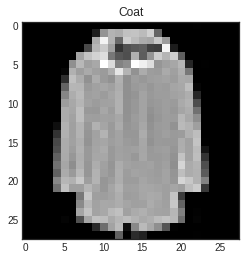

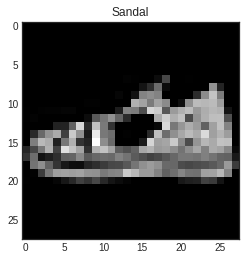

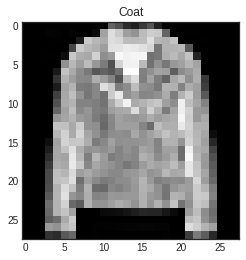

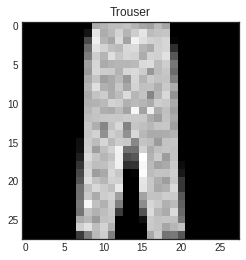

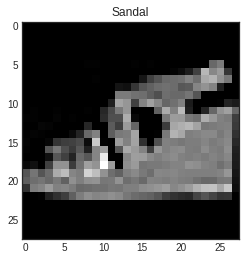

In [ ]:
for image, label in train_ds.take(5):
  plt.title("{}".format(class_names[label[0]]))
  plt.imshow(image[0, :, :], cmap='gray')
  plt.show()

### 모델 생성
- 임의의 모델

In [ ]:
def build_model():
  input = Input(shape=(28, 28), name='input')
  flatten = Flatten(input_shape=[28, 28], name='flatten')(input)
  
  hidden1 = Dense(256, kernel_initializer='he_normal', name='hidden1')(flatten)
  hidden1 = BatchNormalization()(hidden1)
  hidden1 = Activation('relu')(hidden1)
  dropout1 = Dropout(0.5)(hidden1)

  hidden2 = Dense(100, kernel_initializer='he_normal', name='hidden2')(dropout1)
  hidden2 = BatchNormalization()(hidden2)
  hidden2 = Activation('relu')(hidden2)
  dropout2 = Dropout(0.5)(hidden2)

  hidden3 = Dense(100, kernel_initializer='he_normal', name='hidden3')(dropout2)
  hidden3 = BatchNormalization()(hidden3)
  hidden3 = Activation('relu')(hidden3)
  dropout3 = Dropout(0.5)(hidden3)

  hidden4 = Dense(50, kernel_initializer='he_normal', name='hidden4')(dropout3)
  hidden4 = BatchNormalization()(hidden4)
  hidden4 = Activation('relu')(hidden4)
  dropout4 = Dropout(0.5)(hidden4)

  output = Dense(10, activation='softmax', name='output')(dropout4)

  model = Model(inputs=[input], outputs=output)

  return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 100)              

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [ ]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss= loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
epochs = 20

for epoch in range(epochs):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = "Epochs {:3d}\tLoss: {:.4f}\tAccuracy: {:.4f}\tTest Loss: {:.4f}\tTest Accuracy: {:.4f}\t"
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

Epochs   1	Loss: 0.5029	Accuracy: 81.9217	Test Loss: 0.4480	Test Accuracy: 83.7200	
Epochs   2	Loss: 0.4389	Accuracy: 84.1000	Test Loss: 0.4306	Test Accuracy: 84.4600	
Epochs   3	Loss: 0.4048	Accuracy: 85.2506	Test Loss: 0.4129	Test Accuracy: 85.1333	
Epochs   4	Loss: 0.3817	Accuracy: 86.0367	Test Loss: 0.4062	Test Accuracy: 85.1700	
Epochs   5	Loss: 0.3641	Accuracy: 86.6310	Test Loss: 0.3950	Test Accuracy: 85.6120	
Epochs   6	Loss: 0.3498	Accuracy: 87.1303	Test Loss: 0.3891	Test Accuracy: 85.9283	
Epochs   7	Loss: 0.3378	Accuracy: 87.5395	Test Loss: 0.3891	Test Accuracy: 86.0629	
Epochs   8	Loss: 0.3275	Accuracy: 87.8800	Test Loss: 0.3867	Test Accuracy: 86.1663	
Epochs   9	Loss: 0.3183	Accuracy: 88.1878	Test Loss: 0.3821	Test Accuracy: 86.3800	
Epochs  10	Loss: 0.3101	Accuracy: 88.4720	Test Loss: 0.3798	Test Accuracy: 86.4890	
Epochs  11	Loss: 0.3027	Accuracy: 88.7176	Test Loss: 0.3758	Test Accuracy: 86.6745	
Epochs  12	Loss: 0.2959	Accuracy: 88.9594	Test Loss: 0.3721	Test Accuracy: 8

### 모델 학습 : 2번째 방법 (Keras)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(x_train_full, y_train_full), (x_test_full, y_test_full) = load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=777)

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

model = build_model()
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)
(10000, 28, 28)
(10000,)
Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
activation_20 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
____________________________________________

5~6분 소요

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=200,
                    shuffle=True,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_cb])

Epoch 1/200
165/165 [==============================] - 3s 15ms/step - loss: 2.5734 - accuracy: 0.1477 - val_loss: 1.8753 - val_accuracy: 0.4757
Epoch 2/200
165/165 [==============================] - 2s 14ms/step - loss: 2.1296 - accuracy: 0.2345 - val_loss: 1.5879 - val_accuracy: 0.5681
Epoch 3/200
165/165 [==============================] - 2s 14ms/step - loss: 1.9148 - accuracy: 0.2967 - val_loss: 1.4289 - val_accuracy: 0.6098
Epoch 4/200
165/165 [==============================] - 2s 14ms/step - loss: 1.7637 - accuracy: 0.3466 - val_loss: 1.3130 - val_accuracy: 0.6312
Epoch 5/200
165/165 [==============================] - 2s 14ms/step - loss: 1.6558 - accuracy: 0.3830 - val_loss: 1.2272 - val_accuracy: 0.6553
Epoch 6/200
165/165 [==============================] - 2s 14ms/step - loss: 1.5632 - accuracy: 0.4154 - val_loss: 1.1465 - val_accuracy: 0.6676
Epoch 7/200
165/165 [==============================] - 2s 14ms/step - loss: 1.4846 - accuracy: 0.4453 - val_loss: 1.0786 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 모델 평가

In [ ]:
model.evaluate(x_test, y_test, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 4.2064 - accuracy: 0.1000


[4.206422328948975, 0.10000000149011612]

### 결과 확인

In [ ]:
test_img = x_test[0, :, :]
print(test_img.shape)

(28, 28)


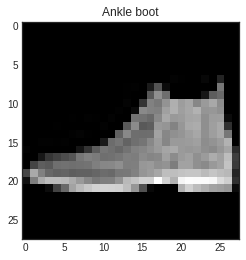

In [ ]:
plt.title(class_names[y_test[0]])
plt.imshow(test_img, cmap='gray')
plt.show()

In [ ]:
pred = model.predict(test_img.reshape(1, 28, 28))

In [ ]:
pred.shape

(1, 10)

In [ ]:
pred

array([[0.00704285, 0.00104932, 0.00860977, 0.00452696, 0.0026396 ,
        0.84895486, 0.00808285, 0.06674058, 0.02180141, 0.03055174]],
      dtype=float32)

In [ ]:
class_names[np.argmax(pred)]

'Sandal'

### Test Batch Dataset

In [ ]:
test_batch = x_test[:32, :, :]
test_batch_y = y_test[:32]
print(test_batch.shape)

(32, 28, 28)


In [ ]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

In [ ]:
preds_arg = np.argmax(preds, -1)

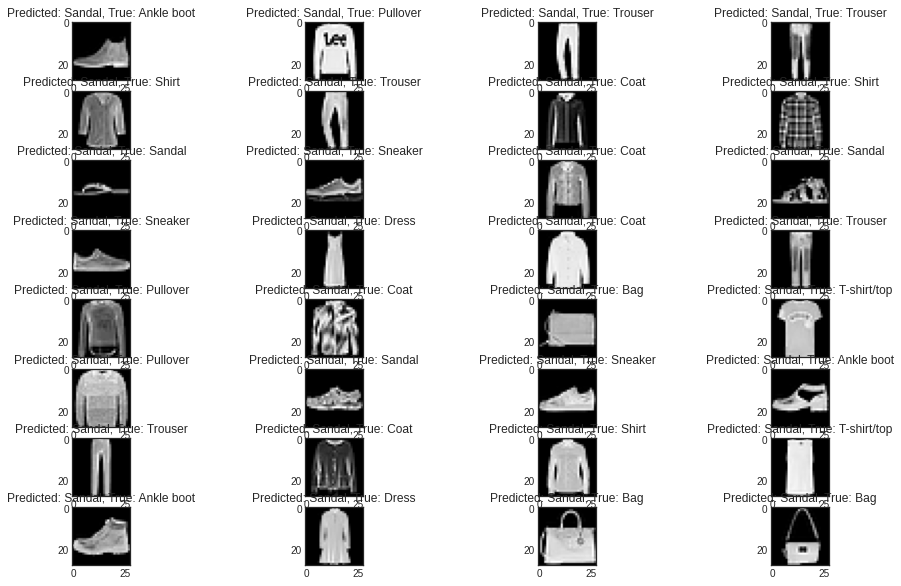

In [ ]:
num_rows=8
num_cols=4
num_images = num_rows * num_cols

plt.figure(figsize=(16, 10))

for idx in range(1, 33, 1):
  plt.subplot(num_rows, num_cols, idx)
  plt.title("Predicted: {}, True: {}".format(class_names[preds_arg[idx-1]],
                                             class_names[test_batch_y[idx-1]]))
  plt.imshow(test_batch[idx-1], cmap='gray')

plt.show()